In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data50=pd.read_csv("Future50.csv")
data50.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


In [60]:
data250=pd.read_csv("Top250.csv")
data250.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


In [5]:
data50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         50 non-null     int64 
 1   Restaurant   50 non-null     object
 2   Location     50 non-null     object
 3   Sales        50 non-null     int64 
 4   YOY_Sales    50 non-null     object
 5   Units        50 non-null     int64 
 6   YOY_Units    50 non-null     object
 7   Unit_Volume  50 non-null     int64 
 8   Franchising  50 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


YOY sale, YOY Units가 object이므로 float 형식으로 바꾸어줘야한다.

In [6]:
data50.replace({'%':''},regex=True, inplace=True)
data50['YOY_Sales']=data50['YOY_Sales'].astype(float)
data50['YOY_Units']=data50['YOY_Units'].astype(float)
data50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         50 non-null     int64  
 1   Restaurant   50 non-null     object 
 2   Location     50 non-null     object 
 3   Sales        50 non-null     int64  
 4   YOY_Sales    50 non-null     float64
 5   Units        50 non-null     int64  
 6   YOY_Units    50 non-null     float64
 7   Unit_Volume  50 non-null     int64  
 8   Franchising  50 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.6+ KB


In [7]:
data250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              250 non-null    int64 
 1   Restaurant        250 non-null    object
 2   Content           33 non-null     object
 3   Sales             250 non-null    int64 
 4   YOY_Sales         250 non-null    object
 5   Units             250 non-null    int64 
 6   YOY_Units         250 non-null    object
 7   Headquarters      52 non-null     object
 8   Segment_Category  250 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.7+ KB


In [8]:
data250.replace({'%':''},regex=True, inplace=True)
data250['YOY_Sales']=data250['YOY_Sales'].astype(float)
data250['YOY_Units']=data250['YOY_Units'].astype(float)
data250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              250 non-null    int64  
 1   Restaurant        250 non-null    object 
 2   Content           33 non-null     object 
 3   Sales             250 non-null    int64  
 4   YOY_Sales         250 non-null    float64
 5   Units             250 non-null    int64  
 6   YOY_Units         250 non-null    float64
 7   Headquarters      52 non-null     object 
 8   Segment_Category  250 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 17.7+ KB


In [9]:
number_type=data50.loc[:,data50.dtypes!=np.object]
number_type.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume
0,1,24,130.5,26,116.7,1150
1,2,44,121.9,105,94.4,560
2,3,21,81.0,21,90.9,1370
3,4,25,79.7,46,58.6,685
4,5,49,77.1,50,56.3,1210


In [10]:
object_type=data50.loc[:,data50.dtypes==np.object]
object_type.head()

,Restaurant,Location,Franchising
0,Evergreens,"Seattle, Wash.",No
1,Clean Juice,"Charlotte, N.C.",Yes
2,Slapfish,"Huntington Beach, Calif.",Yes
3,Clean Eatz,"Wilmington, N.C.",Yes
4,Pokeworks,"Irvine, Calif.",Yes


<Figure size 864x864 with 0 Axes>

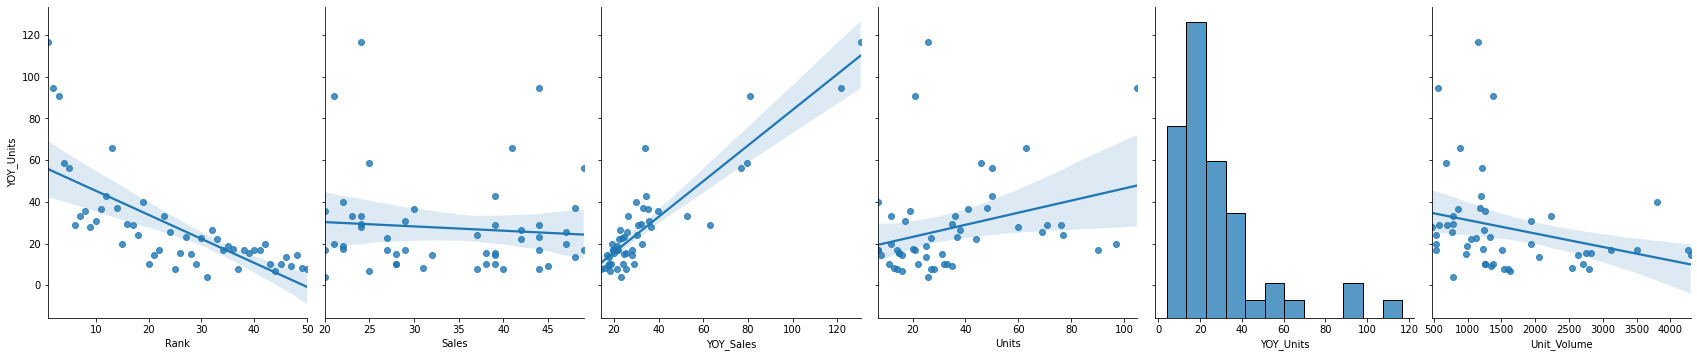

In [16]:
plt.figure(figsize=(12,12))
sns.pairplot(data50,x_vars=number_type.columns,y_vars=['YOY_Units'],height=5,aspect=.8,kind='reg')

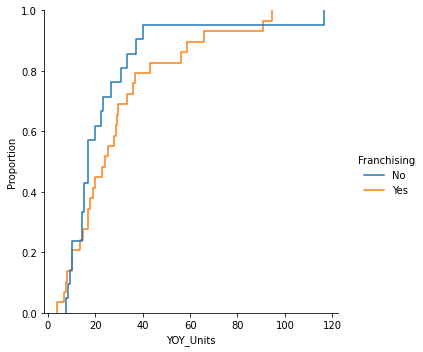

In [12]:
sns.displot(data50,x="YOY_Units",hue="Franchising",kind="ecdf")

In [13]:
data50.Location.unique()

array(['Seattle, Wash.', 'Charlotte, N.C.', 'Huntington Beach, Calif.',
       'Wilmington, N.C.', 'Irvine, Calif.', 'Belmar,  N.J.',
       'Blue Bell, Pa.', 'New York, N.Y.', 'Yorba Linda,  Calif.',
       'Louisville, Ky.', 'Spartanburg, S.C.', 'Pasadena, Calif.',
       'Denver, Colo.', 'Plano, Texas', 'Kettering, Ohio',
       'San Francisco, Calif.', 'San Ramon, Calif.', 'Orlando, Fla.',
       'Orange Park, Fla.', 'Doral, Fla.', 'Mechanicsburg, Pa.',
       'Olivette, Mo.', 'Columbus, Ohio', 'Wall Township, N.J.',
       'Anaheim, Calif.', 'Frisco, Texas', 'Fairfax, Va.', 'Douglas, Ga.',
       'Scottsdale, Ariz.', 'Atlanta, Ga.', 'Omaha, Neb.',
       'Medford, Ore.', 'Los Angeles, Calif.', 'Conway, Ark.',
       'Fairburn, Ga.', 'McAllen, Texas', 'Washington, D.C.',
       'Agoura Hills, Calif.', 'Memphis, Tenn.'], dtype=object)

In [14]:
nl=data50['Location'].str.split(",",n=1,expand=True)
data50["City"]=nl[0]
data50['State']=nl[1]
data50.drop(columns=['Location'],inplace=True)
data50.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,City,State
0,1,Evergreens,24,130.5,26,116.7,1150,No,Seattle,Wash.
1,2,Clean Juice,44,121.9,105,94.4,560,Yes,Charlotte,N.C.
2,3,Slapfish,21,81.0,21,90.9,1370,Yes,Huntington Beach,Calif.
3,4,Clean Eatz,25,79.7,46,58.6,685,Yes,Wilmington,N.C.
4,5,Pokeworks,49,77.1,50,56.3,1210,Yes,Irvine,Calif.


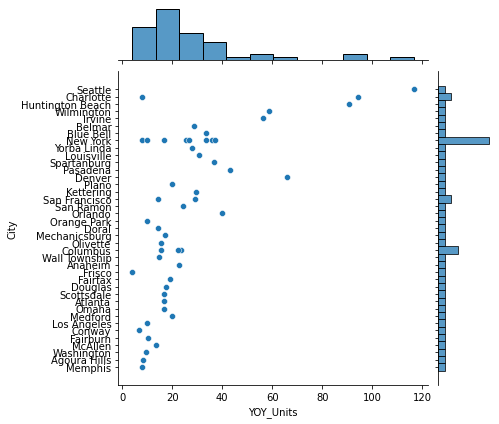

In [18]:
sns.jointplot(data=data50,x="YOY_Units",y="City")

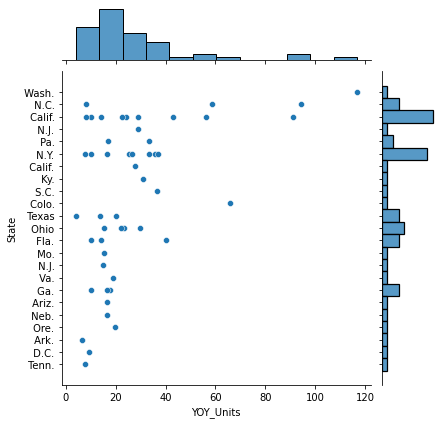

In [19]:
sns.jointplot(data=data50,x="YOY_Units",y="State")

In [21]:
data250.dtypes

Rank                  int64
Restaurant           object
Content              object
Sales                 int64
YOY_Sales           float64
Units                 int64
YOY_Units           float64
Headquarters         object
Segment_Category     object
dtype: object

In [22]:
data250_number=data250.loc[:,data250.dtypes!=np.object]
data250_number.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units
0,1,40412,4.9,13846,-0.5
1,2,21380,8.6,15049,3.0
2,3,11320,13.0,2470,5.0
3,4,11293,9.0,6766,2.7
4,5,10204,2.7,7346,0.2


In [24]:
data250_object=data250.loc[:,data250.dtypes==np.object]
data250_object.head()

,Restaurant,Content,Headquarters,Segment_Category
0,McDonald's,NaN,NaN,Quick Service & Burger
1,Starbucks,NaN,NaN,Quick Service & Coffee Cafe
2,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,NaN,Quick Service & Chicken
3,Taco Bell,NaN,NaN,Quick Service & Mexican
4,Burger King,NaN,NaN,Quick Service & Burger


<Figure size 864x864 with 0 Axes>

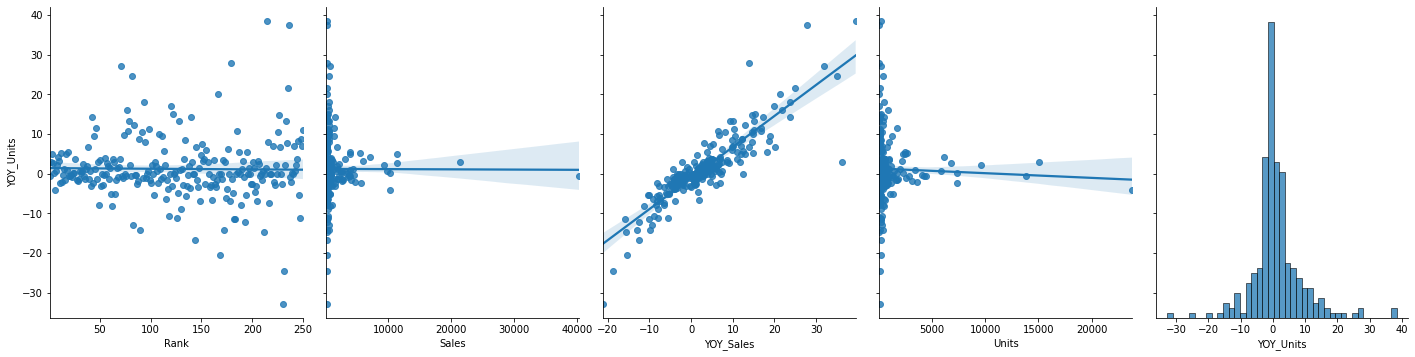

In [26]:
plt.figure(figsize=(12,12))
sns.pairplot(data250,x_vars=data250_number.columns,y_vars=['YOY_Units'],height=5,aspect=.8,kind="reg")

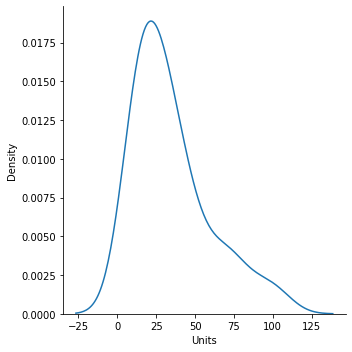

In [27]:
sns.displot(data50,x="Units",kind="kde")

In [29]:
mean_units=np.mean(data50['Units'])
mean_units

34.7

In [30]:
def change_data(row):
    if row['Units']>=34.7:
        return "Large"
    elif row['Units']<34.7:
        return "Small"
    else:
        return 1

In [31]:
data50.loc[:,'Units']=data50.apply(change_data,axis=1)

In [32]:
data50.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,City,State
0,1,Evergreens,24,130.5,Small,116.7,1150,No,Seattle,Wash.
1,2,Clean Juice,44,121.9,Large,94.4,560,Yes,Charlotte,N.C.
2,3,Slapfish,21,81.0,Small,90.9,1370,Yes,Huntington Beach,Calif.
3,4,Clean Eatz,25,79.7,Large,58.6,685,Yes,Wilmington,N.C.
4,5,Pokeworks,49,77.1,Large,56.3,1210,Yes,Irvine,Calif.


Text(0.5, 1.0, 'Compare Units and YOY_Sales')

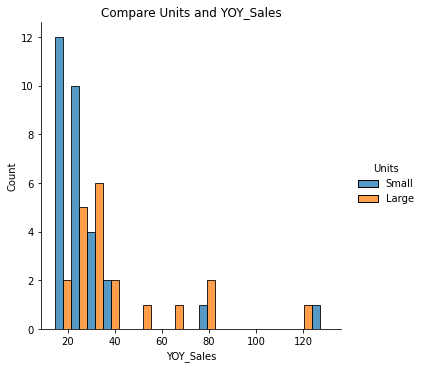

In [33]:
sns.displot(data50,x="YOY_Sales",hue="Units",multiple="dodge")
plt.title('Compare Units and YOY_Sales')

건물수와 전년 대비 매출 증가율의 관계

Text(0.5, 1.0, 'Compare Units and YOY_Sales')

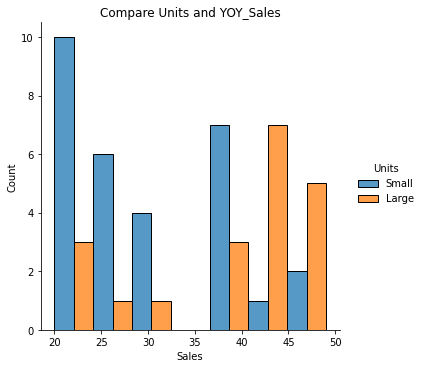

In [34]:
sns.displot(data50,x="Sales",hue="Units",multiple="dodge")
plt.title('Compare Units and YOY_Sales')

건물수과 판매량의 관계

Text(0.5, 1.0, 'Compare Units and State')

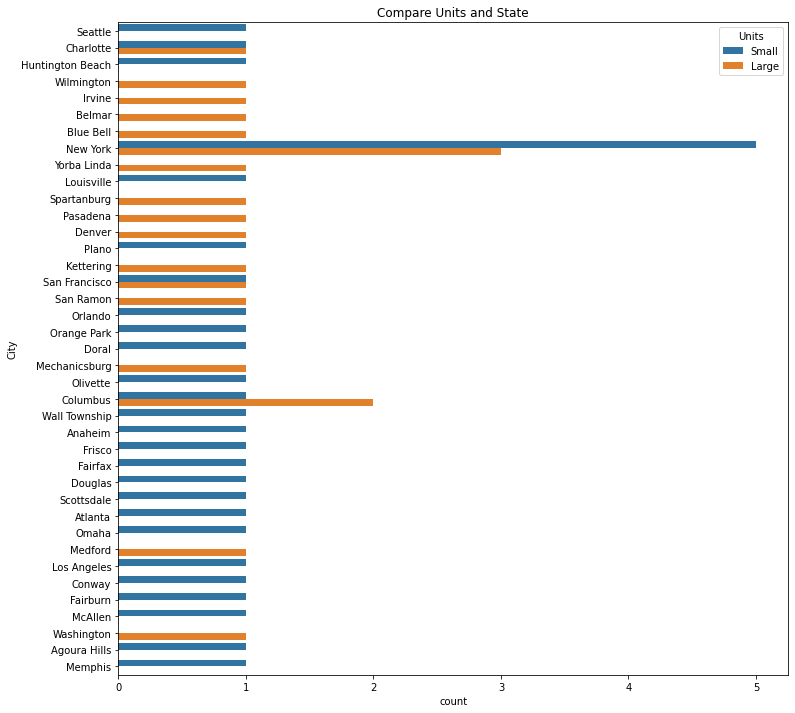

In [38]:
plt.figure(figsize=(12,12))
sns.countplot(y='City',hue="Units",data=data50)
plt.title("Compare Units and State")

# countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다. 
#데이터 프레임에만 사용할 수 있고, data 인수에는 대상이 되는 데이터프레임을 x인수에는 데이터프레임의 열 이름 문자열을 넣는다. 

Text(0.5, 1.0, 'Compare Units and State')

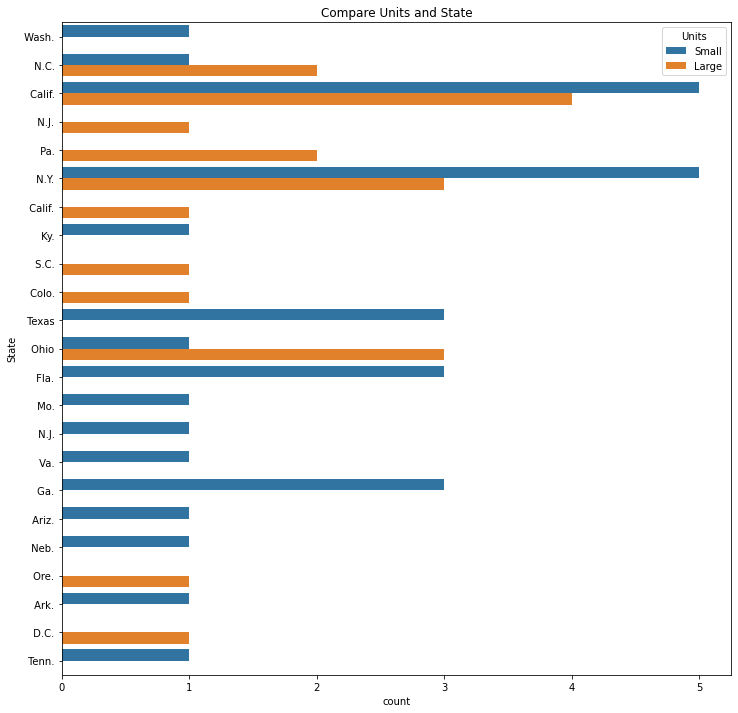

In [41]:
plt.figure(figsize=(12,12))
sns.countplot(y="State",hue='Units',data=data50)
plt.title("Compare Units and State")

Text(0.5, 1.0, 'Compare Units and Franchising')

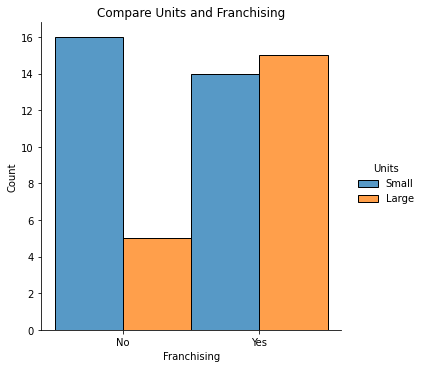

In [42]:
sns.displot(data50,x="Franchising",hue="Units",multiple="dodge")
plt.title('Compare Units and Franchising')

프랜차이즈일 수록 건물수가 많다. 

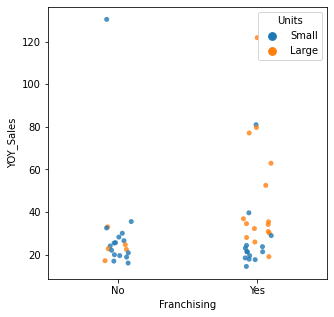

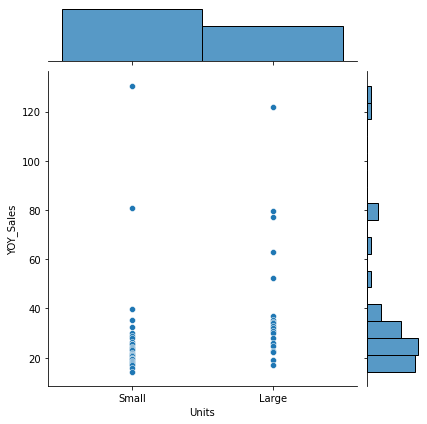

In [44]:
plt.figure(figsize=(5,5))
sns.stripplot(y='YOY_Sales',x='Franchising',data=data50,jitter=True,marker='o',alpha=0.8,hue='Units')
sns.jointplot(data=data50,x="Units",y="YOY_Sales")

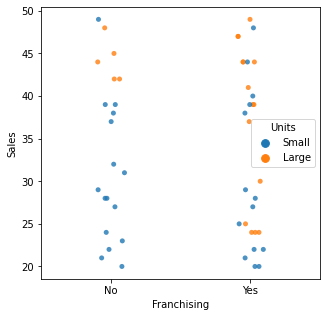

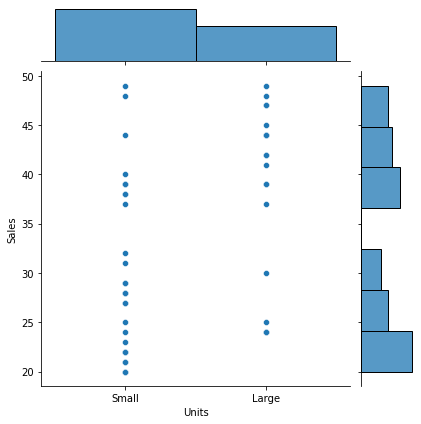

In [45]:
plt.figure(figsize=(5,5))
sns.stripplot(y='Sales', x='Franchising',data=data50, jitter=True, marker='o',alpha=0.8,hue='Units')
sns.jointplot(data=data50, x="Units", y="Sales")

In [46]:
data250.Segment_Category.unique()

array(['Quick Service & Burger', 'Quick Service & Coffee Cafe',
       'Quick Service & Chicken', 'Quick Service & Mexican',
       'Quick Service & Sandwich', 'Quick Service & Pizza',
       'Fast Casual & Bakery Cafe', 'Fast Casual & Mexican',
       'Casual Dining & Italian/Pizza', 'Casual Dining & Varied Menu',
       'Fast Casual & Asian/Noodle', 'Quick Service & Frozen Desserts',
       'Casual Dining & Sports Bar', 'Family Dining & Family Style',
       'Casual Dining & Steak', 'Casual Dining & Seafood',
       'Fast Casual & Sandwich', 'Fast Casual & Chicken',
       'Quick Service & Family Casual', 'Fast Casual & Burger',
       'Casual Dining & Asian', 'Quick Service & Snack', 'Steak',
       'Quick Service & Beverage', 'Sports Bar',
       'Quick Service & Seafood', 'Quick Service & Bakery Cafe',
       'Fast Casual & Pizza', 'Fine Dining & Steak', 'Mexican',
       'Varied Menu', 'Chicken', 'Italian/Pizza', 'Pizza', 'Seafood',
       'Frozen Desserts', 'Coffee Cafe', 'BBQ',

In [51]:
data250['Segment_Category']

0           Quick Service  Burger
1      Quick Service  Coffee Cafe
2          Quick Service  Chicken
3          Quick Service  Mexican
4           Quick Service  Burger
                  ...            
245                   Varied Menu
246                       Chicken
247                       Mexican
248                        Burger
249                       Chicken
Name: Segment_Category, Length: 250, dtype: object

In [69]:
service=[]
for i in range(len(data250)):
    if len(data250.Segment_Category.iloc[i].split("&"))!=1:
        service.append(data250.Segment_Category.iloc[i].split("&")[0])
    else:
        service.append("NaN")
        
    

data250['Service']=service
data250['Food']=data250.Segment_Category.apply(lambda d:d.split("&")[-1]).apply(lambda d:d.strip())
data250.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category,Service,Food
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger,Quick Service,Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe,Quick Service,Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken,Quick Service,Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican,Quick Service,Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger,Quick Service,Burger


In [70]:
data250.Service.unique()

array(['Quick Service ', 'Fast Casual ', 'Casual Dining ',
       'Family Dining ', 'NaN', 'Fine Dining '], dtype=object)

In [71]:
data250.Food.unique()

array(['Burger', 'Coffee Cafe', 'Chicken', 'Mexican', 'Sandwich', 'Pizza',
       'Bakery Cafe', 'Italian/Pizza', 'Varied Menu', 'Asian/Noodle',
       'Frozen Desserts', 'Sports Bar', 'Family Style', 'Steak',
       'Seafood', 'Family Casual', 'Asian', 'Snack', 'Beverage', 'BBQ',
       'Healthy', 'Ethnic'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Food'>

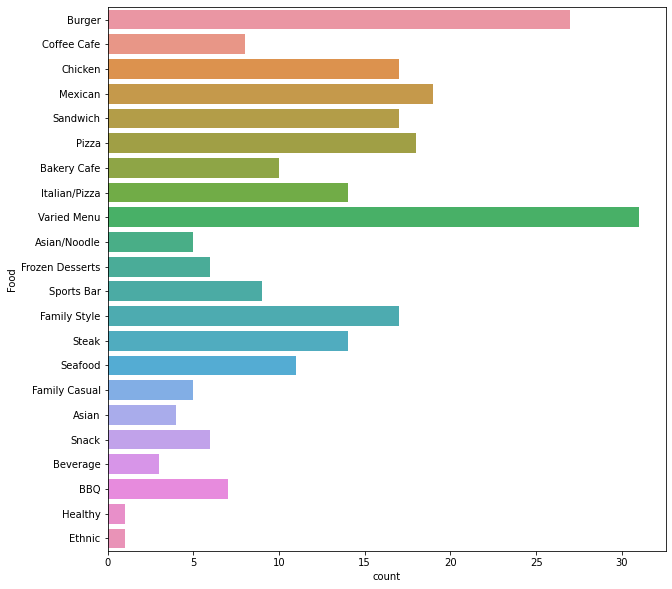

In [72]:
plt.figure(figsize=(10,10))
sns.countplot(y="Food",data=data250)

<AxesSubplot:xlabel='count', ylabel='Service'>

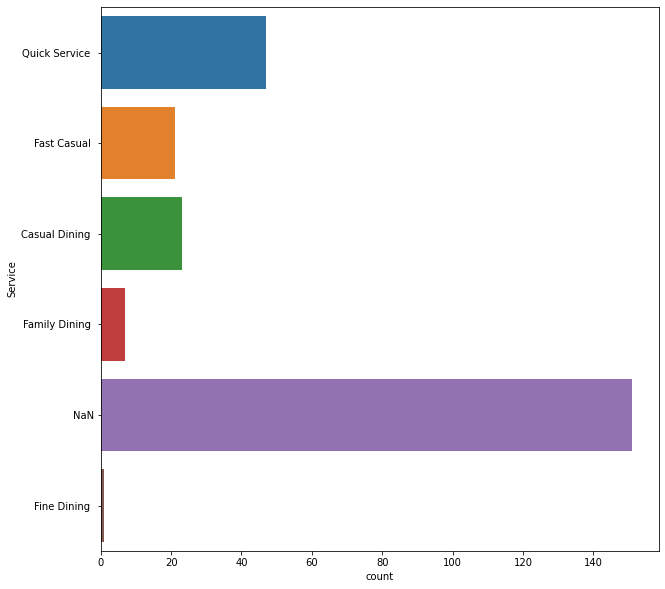

In [73]:
plt.figure(figsize=(10,10))
sns.countplot(y="Service",data=data250)